In [148]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *
from copy import deepcopy

In [150]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
#model_new = deepcopy(model)

In [151]:
from estimation import *

In [152]:
#est_par = ['gamma', 'sigma', 'cost1', 'cost2'] # Parameters to estimate
est_par = ['gamma', 'sigma', 'N', 'cost1', 'cost2', 'welfare', 'type_shares1'] # Parameters to estimate
theta0 = [0.9, 0.1, 10, 100, 300, 100, 0.1] # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0,45), (0.0,500,0), (0.0,500,0), (0.0,114/675), (0.0,1.0)] # Bounds for the parameters

est = method_simulated_moments(model, est_par,theta0,bounds)


/Users/sophiebune/Desktop/Dynamic-programming-project/estimation.py:33: OptimizeWarning: Initial guess is not within the specified bounds
  res = minimize(obj_fun,theta0, method='nelder-mead', bounds = bounds)
/Users/sophiebune/Desktop/Dynamic-programming-project/hand_to_mouth.py:66: RuntimeWarning: invalid value encountered in scalar add
  V_u[i,t] = utility(par,income,r) - cost(par,s[i,t])[i] + par.delta * (s[i,t] * V_e_next+(1-s[i,t])*V_u[i,t+1])
/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:40: RuntimeWarning: invalid value encountered in scalar power
  inv_c_marg[0] = (s/par.cost1)**(1/par.gamma)
/Users/sophiebune/Desktop/Dynamic-programming-project/Funcs.py:41: RuntimeWarning: invalid value encountered in scalar power
  inv_c_marg[1] = (s/par.cost2)**(1/par.gamma)


In [153]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0000
Parameters:              0.201, 0.035, 5.764, 140.455, 404.561, 0.169, 0.581
Number of iterations:    905


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


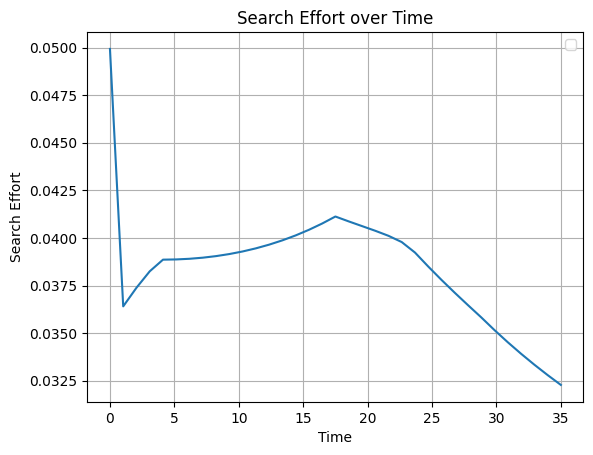

In [154]:
sim = sim_search_effort(model.par)
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


In [155]:
model.par.b1 = 342.0/675.0
model.par.b2 = 171.0/675.0

model.allocate()
s_forecast = model.solve()



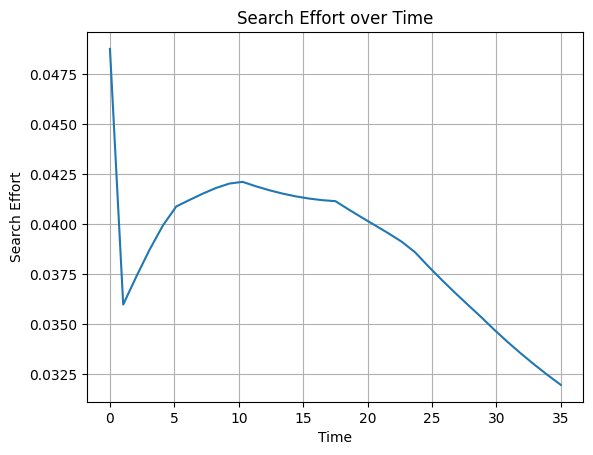

In [156]:
# Now plotting s_forecast
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, s_forecast, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [157]:
true_data = model.data.moments_after
print(np.shape(true_data))
print(np.shape(s_forecast))
# Get the mean square errors
mse_eta1 = np.mean((true_data - s_forecast)**2)
print(mse_eta1)

(35, 1)
(35,)
7.8071167671479e-05


# No reference dependence

In [158]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
model_new = deepcopy(model)

In [159]:

model_new.par.eta = 0.0

# model_new = model.copy()
# model_new.par.eta = 0.0

est_par = ['gamma', 'sigma', 'cost1', 'cost2'] # Parameters to estimate
theta0 = [0.9, 0.1, 100.0, 100.0] # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0.0,500.0), (0.0,500.0)] # Bounds for the parameters

est = method_simulated_moments(model_new, est_par,theta0,bounds)

In [160]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.0000
Parameters:              0.081, 0.017, 73.486, 316.155
Number of iterations:    184


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


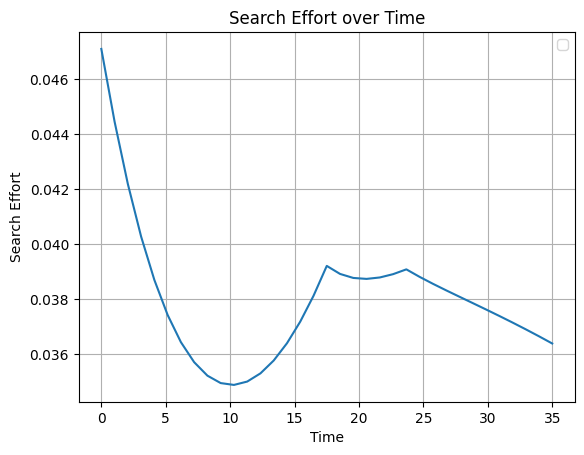

In [161]:
sim_new = sim_search_effort(model_new.par)
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, sim_new, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


In [162]:
model_new.par.b1 = 342.0/675.0
model_new.par.b2 = 171.0/675.0

model_new.allocate()
s_forecast_new = model_new.solve()



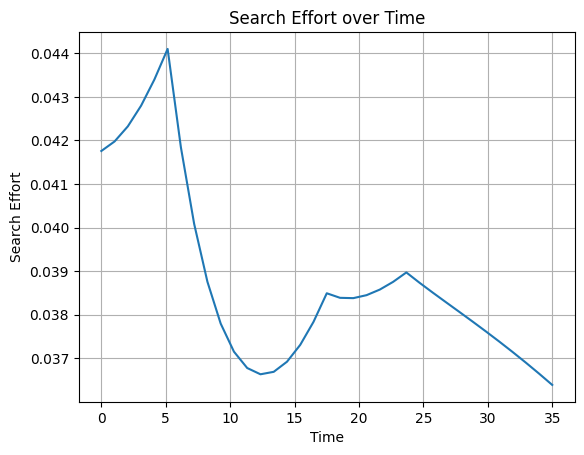

In [163]:
# Now plotting s_forecast
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, s_forecast_new, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [164]:
true_data = model_new.data.moments_after
before = model_new.data.moments_before
# print(np.shape(true_data))
# print(np.shape(s_forecast_new))
# Get the mean square errors
mse_eta0 = np.mean((true_data - s_forecast_new)**2)
print(f"{mse_eta1:.6f}")
print(f"{mse_eta0:.6f}")

if mse_eta0 < mse_eta1:
    print("The model with eta = 0 is better (out-of-sample)")
else:
    print("The model with eta = 1 is better (out-of-sample)")

mse_eta0_in = np.mean((before - sim_new)**2)
mse_eta1_in = np.mean((before - sim)**2)
print(f"{mse_eta1_in:.6f}")
print(f"{mse_eta0_in:.6f}")

if mse_eta0_in < mse_eta1_in:
    print("The model with eta = 0 is better (in-sample)")
else:
    print("The model with eta = 1 is better (in-sample)")

0.000078
0.000070
The model with eta = 0 is better (out-of-sample)
0.000105
0.000101
The model with eta = 0 is better (in-sample)


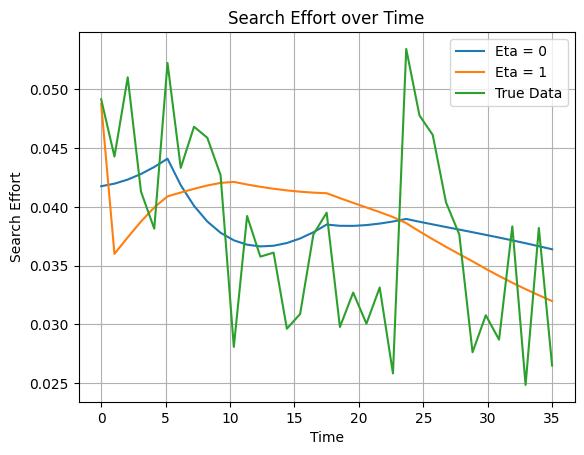

In [165]:
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, s_forecast_new, label='Eta = 0')
plt.plot(time, s_forecast, label='Eta = 1')
plt.plot(time, true_data, label='True Data')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

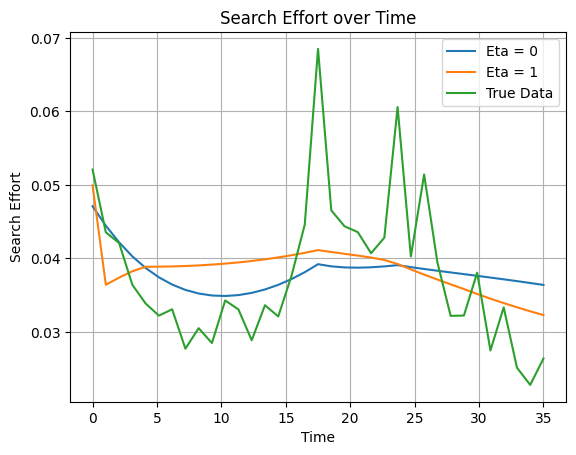

In [166]:
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, sim_new, label='Eta = 0')
plt.plot(time, sim, label='Eta = 1') 
plt.plot(time, before, label='True Data')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()